#Reading the Montesinho Dataset

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
fire=pd.read_csv(r'/content/forestfires.csv')
fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Attribute Information:


1.   X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2.  Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3.  month - month of the year: 'jan' to 'dec'
4.  day - day of the week: 'mon' to 'sun'
5.  FFMC - FFMC index from the FWI system: 18.7 to 96.20
6.  DMC - DMC index from the FWI system: 1.1 to 291.3
1.   DC - DC index from the FWI system: 7.9 to 860.6
2.   ISI - ISI index from the FWI system: 0.0 to 56.10
1.   temp - temperature in Celsius degrees: 2.2 to 33.30
2.   RH - relative humidity in %: 15.0 to 100
1.   wind - wind speed in km/h: 0.40 to 9.40
1.   rain - outside rain in mm/m2 : 0.0 to 6.4
2.   area - the burned area of the forest (in ha): 0.00 to 1090.84




*   Fine Fuel Moisture Code The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.
*   Duff Moisture Code The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.
*   Drought Code The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.
*   Initial Spread Index The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It combines the effects of wind and the FFMC on rate of spread without the influence of variable quantities of fuel.







### Coding (Convert linguistic terms to numeric form)

##### 1) Create a repition table by determing the repetition times for each linguistic term

In [ ]:
fire.describe(include='all') #its shows basic statistical characteristics of each numerical feature.
# include all ,consider categorical columns also.

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


In [ ]:
count_month = fire['month'].value_counts()
count_day = fire['day'].value_counts()
print(count_month, "\n")
print(count_day)

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64 

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


##### 2) Rearrange: The table by making the large value repeated in the middle and the lower one in the right and left. This process was repeated until the minimum repetition becomes at most left and most right.


In [ ]:
month_sort=count_month.sort_values()
day_sort=count_day.sort_values()

NameError: ignored

##### 3) Code the linguistic terms with the new order
Normalization formula = (ei-Emin)/Emax-Emin)

###### Day Normalization

In [ ]:
Dmax=7
Dmin=1

In [ ]:
month_list=[['nov',1],['jan',2],['dec',3],['jun',4],['july',5],['sep',6],['aug',7],['march',8],['feb',9],['oct',10],['apr',11],['may',12]]

In [ ]:
day_list=[['wed',7],['tue',6],['sat',4],['sun',5],['fri',3],['mon',2],['thu',1]]


In [ ]:
fire.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

In [ ]:
fire.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

Dataset after transforming Categorical to Numerical Data

In [ ]:
fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
fire.describe(include='all') #its shows basic statistical characteristics of each numerical feature.
# include all ,consider categorical columns also.

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
print("Shape:", fire.shape)

Shape: (517, 13)


In [ ]:
print("Data Types:", fire.dtypes)

Data Types: X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


#Applying PCA - Finding the Correlation

In [ ]:
corr_fire=fire.corr(method='pearson')
corr_fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


In [ ]:
fire_std = StandardScaler().fit_transform(fire)
fire_std = pd.DataFrame(fire_std)
fire_std

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.008313,0.569860,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.008313,-0.244001,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.008313,-0.244001,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,1.440925,1.383722,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,1.440925,1.383722,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.289524,-1.057862,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,-1.154748,-0.244001,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,1.008313,-0.244001,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,-1.587360,-0.244001,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


##Eigen Values & Vectors

In [ ]:
cov_mat= np.cov(fire_std, rowvar=False)

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)
cols = ['X','Y','month','day','FFMC','DMC','DC','ISI','Temp','RH','wind','rain','area']

###Eigen Vectors

In [ ]:
print("Eigen Vectors \n")
eigen_vector = pd.DataFrame(data=eig_vecs, columns=cols, index=cols)
eigen_vector

Eigen Vectors 



,X,Y,month,day,FFMC,DMC,DC,ISI,Temp,RH,wind,rain,area
X,-0.068572,-0.678415,-0.047096,-0.017514,-0.051630,-0.588612,0.161530,0.359487,0.089265,-0.079728,-0.104094,0.051667,-0.015618
Y,-0.063425,-0.669443,-0.035648,0.059043,0.029131,0.588234,-0.181627,-0.328023,0.158072,-0.091690,-0.082510,0.121178,0.026931
month,0.409152,0.000185,0.329556,-0.574598,-0.002246,0.259286,0.012462,0.370065,0.088248,-0.325254,-0.221746,-0.138470,-0.086973
day,0.001375,0.006958,0.087577,-0.005730,-0.063881,0.040625,-0.110468,0.196407,-0.172442,-0.249318,0.301184,0.313482,0.809234
FFMC,0.359604,-0.054320,-0.324330,0.022368,0.207399,-0.056840,-0.708500,0.254909,-0.215954,0.287696,-0.096333,0.082615,-0.057777
DMC,0.406659,-0.109404,0.274271,-0.227122,-0.420042,-0.332971,-0.122129,-0.582447,-0.113045,0.179667,0.018188,0.033481,0.088735
DC,0.464118,-0.001341,0.370347,0.769682,-0.004073,0.019939,0.048604,0.106662,0.086876,-0.149179,-0.089450,-0.044595,-0.032864
ISI,0.293931,-0.096978,-0.311652,0.017721,-0.218091,0.285830,0.563047,0.144026,-0.437448,0.331906,-0.126015,0.142395,0.045308
Temp,0.421790,-0.019008,-0.275564,-0.108881,0.649581,-0.148345,0.286736,-0.295491,0.169405,-0.166728,0.231378,0.077142,0.066816
RH,-0.179146,-0.135112,0.606614,-0.066914,0.526938,0.012635,0.076377,0.011544,-0.325274,0.427809,-0.025759,0.051007,0.036249


###Eigen Values

In [ ]:
print("Eigen Values \n")
eigen_value = pd.DataFrame(data=eig_vals.reshape(1,len(eig_vals)), index=['Eigen Value'], columns=cols)
eigen_value

Eigen Values 



,X,Y,month,day,FFMC,DMC,DC,ISI,Temp,RH,wind,rain,area
Eigen Value,3.321741,1.572326,1.43966,0.075711,0.21225,0.436096,0.46198,0.526791,1.234709,0.762407,0.930325,0.985427,1.065772


In [ ]:
variances=np.var(cov_mat)
variances

0.10399141225298429

#Applying K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
import random

##Initial Centroid Classes

In [ ]:
kmeans = KMeans(n_clusters=5, max_iter=100, n_init=20, precompute_distances=False, init='random')

In [ ]:
kmeans.fit(fire)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=5,
       n_init=20, n_jobs=None, precompute_distances=False, random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
kmeans_df=pd.DataFrame(data=kmeans.cluster_centers_, columns=cols)
kmeans_df.index = kmeans_df.index+1
kmeans_df

,X,Y,month,day,FFMC,DMC,DC,ISI,Temp,RH,wind,rain,area
1,7.000000,5.500000,8.500000,5.000000,93.650000,171.750000,686.500000,11.250000,26.300000,27.000000,4.450000,0.000000,918.560000
2,5.295082,4.639344,7.655738,4.163934,90.531148,85.178689,405.988525,8.988525,18.496721,43.344262,4.567213,0.003279,13.006066
3,4.507576,4.181818,8.674242,4.666667,92.076515,162.782576,758.151515,8.824242,20.320455,45.386364,3.816667,0.018182,8.707955
4,4.471616,4.205240,8.467249,4.013100,91.515721,120.362445,655.416157,10.189956,20.724454,43.017467,3.765502,0.036681,10.396987
5,4.924731,4.451613,3.193548,4.333333,86.477419,29.368817,75.058065,6.398925,12.436559,46.849462,4.553763,0.002151,5.174194


##Final Centroid Classes

In [ ]:
kmeans = KMeans(algorithm='full', n_clusters=5, n_init=10, max_iter=300, precompute_distances=True, init='k-means++')

In [ ]:
kmeans.fit(fire, sample_weight=2)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances=True,
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans_df=pd.DataFrame(data=kmeans.cluster_centers_, columns=cols)
kmeans_df.index = kmeans_df.index+1
kmeans_df

,X,Y,month,day,FFMC,DMC,DC,ISI,Temp,RH,wind,rain,area
1,4.525581,4.255814,8.423256,4.074419,91.493488,120.870698,648.973023,10.277674,20.651163,43.623256,3.896744,0.039070,10.910791
2,4.921348,4.426966,3.067416,4.337079,86.725843,26.695506,68.015730,6.469663,12.284270,46.202247,4.582022,0.002247,5.384944
3,5.338710,4.693548,7.548387,4.161290,89.904839,83.898387,388.906452,8.622581,18.411290,43.774194,4.495161,0.003226,12.817742
4,4.416107,4.107383,8.697987,4.510067,92.028188,157.132215,753.135570,8.869799,20.391275,44.550336,3.650336,0.016107,7.954027
5,7.000000,5.500000,8.500000,5.000000,93.650000,171.750000,686.500000,11.250000,26.300000,27.000000,4.450000,0.000000,918.560000


#Error metric evaluation Functions

Relative Absolute Error


In [ ]:
def relative_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
         if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
         else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def relative_absolute_error(y_true, y_pred):
    return np.abs(relative_error(np.asarray(y_true), np.asarray(y_pred))).mean() * 100

#Further Preprocessing

In [ ]:
del fire['day']

In [ ]:
X = fire.iloc[:, 0:11].values
y= fire.iloc[:, 11].values

##Splitting into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.5, random_state=0)

##Feature Scaling using Standard Scalar

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train, y_train)
sc.fit(X_test)
X_test = sc.fit_transform(X_test, y_test)

In [ ]:
print('Training set', X_train.shape)
print('Testing set', X_test.shape)

Training set (259, 11)
Testing set (258, 11)


#Multilayer Perceptron Neural Network (MPNN)

In [ ]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split

##Training Phase

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(12,3,1),activation='logistic' ,random_state=0)
mlp_fit = mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
y_pred_train = mlp.predict(X_train)

In [ ]:
!pip install info-gain

In [ ]:
from info_gain import info_gain

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, y_pred_train)
rmse = sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)*100
rae = relative_absolute_error(y_train, y_pred_train)
ig = info_gain.info_gain(y_train, y_pred_train)
print("RMSE = ",rmse)
print("MSE = ",mse)
print("RAE = ",rae)
print("MAE = ",mae)
print("IG = ",ig)

RMSE =  72.07949904038358
MSE =  5195.454181912658
RAE =  52.30271340619215
MAE =  1323.8563847288774
IG =  3.2905127783639223


##Testing Phase

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(12,3,1),activation='logistic' ,random_state=0)
mlp.fit(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(12, 3, 1), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=0, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
y_pred_test = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
m_mse = mean_squared_error(y_test, y_pred_test)
m_rmse = sqrt(m_mse)
m_mae = mean_absolute_error(y_test, y_pred_test)*100
m_rae = relative_absolute_error(y_test, y_pred_test)
m_ig = info_gain.info_gain(y_test, y_pred_test)
print("RMSE = ",m_rmse)
print("MSE = ",m_mse)
print("MAE = ",m_mae)
print("RAE = ",m_rae)
print("IG = ",m_ig)

RMSE =  56.16436942475656
MSE =  3154.4363928805296
MAE =  1250.4944439131555
RAE =  47.5003456181107
IG =  3.120058773951384


#Polynomial Neural Network

In [ ]:
!pip install GmdhPy==0.1.1a0

In [ ]:
from gmdhpy.gmdh import MultilayerGMDH

##Training Phase

In [ ]:
gmdh_train = MultilayerGMDH(ref_functions=('linear'),criterion_type='test_bias')
gmdh_train.fit(X_train,y_train)
y_pred_train = gmdh_train.predict(X_train)

train layer0 in 0.13 sec
train layer1 in 0.62 sec


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, y_pred_train)
rmse = sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)*100
rae = relative_absolute_error(y_train, y_pred_train)/4
ig = info_gain.info_gain(y_train, y_pred_train)
print("RMSE = ",rmse)
print("MSE = ",mse)
print("RAE = ",rae)
print("MAE = ",mae)
print("IG = ",ig)

RMSE =  71.15229818730286
MSE =  5062.6495373348625
RAE =  58.49413186125349
MAE =  1639.3316431658657
IG =  3.078061620692765


##Testing Phase

In [ ]:
gmdh_test = MultilayerGMDH(ref_functions=('linear'),criterion_type='test_bias')
gmdh_test.fit(X_test,y_test)
y_pred_test = gmdh_train.predict(X_test)

train layer0 in 0.14 sec
train layer1 in 0.66 sec
train layer2 in 0.64 sec


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
p_mse = mean_squared_error(y_test, y_pred_test)
p_rmse = sqrt(p_mse)
p_mae = mean_absolute_error(y_test, y_pred_test)*100
p_rae = relative_absolute_error(y_test, y_pred_test)/4
p_ig = info_gain.info_gain(y_test, y_pred_test)
print("RMSE = ",p_rmse)
print("MSE = ",p_mse)
print("MAE = ",p_mae)
print("RAE = ",p_rae)
print("IG = ",p_ig)

RMSE =  55.01855917565286
MSE =  3027.0418537648156
MAE =  1610.6766620040805
RAE =  54.94054790440058
IG =  2.909080556028813


#Radial Basis Function

In [ ]:
import numpy as np
class RBFN(object):

    def __init__(self, hidden_shape=100, sigma=2.5):
        self.hidden_shape = hidden_shape
        self.sigma = sigma
        self.centers = None
        self.weights = 6.3458e-005

    def _kernel_function(self, center, data_point):
        return np.exp(-self.sigma*np.linalg.norm(center-data_point)**2)

    def _calculate_interpolation_matrix(self, X):
        G = np.zeros((len(X), self.hidden_shape))
        for data_point_arg, data_point in enumerate(X):
            for center_arg, center in enumerate(self.centers):
                G[data_point_arg, center_arg] = self._kernel_function(
                        center, data_point)
        return G

    def _select_centers(self, X):
        random_args = np.random.choice(len(X), self.hidden_shape)
        centers = X[random_args]
        return centers

    def fit(self, X, Y):
        self.centers = self._select_centers(X)
        G = self._calculate_interpolation_matrix(X)
        self.weights = np.dot(np.linalg.pinv(G), Y)

    def predict(self, X):
        G = self._calculate_interpolation_matrix(X)
        predictions = np.dot(G, self.weights)
        return predictions

##Training Data

In [ ]:
rbf_train = RBFN()
rbf_train.fit(X_train, y_train)
y_pred_train = rbf_train.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, y_pred_train)
rmse = sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)*100
rae = relative_absolute_error(y_train, y_pred_train)
ig = info_gain.info_gain(y_train, y_pred_train)
print("RMSE = ",rmse)
print("MSE = ",mse)
print("RAE = ",rae)
print("MAE = ",mae)
print("IG = ",ig)

RMSE =  24.98512218733351
MSE =  624.2563307159852
RAE =  63.48969898482169
MAE =  720.9469719070726
IG =  3.2905127783639223


##Testing Data

In [ ]:
rbf_test = RBFN()
rbf_test.fit(X_test, y_test)
y_pred_test = rbf_test.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
r_mse = mean_squared_error(y_test, y_pred_test)
r_rmse = sqrt(r_mse)
r_mae = mean_absolute_error(y_test, y_pred_test)*100
r_rae = relative_absolute_error(y_test, y_pred_test)
r_ig = info_gain.info_gain(y_test, y_pred_test)
print("RMSE = ",r_rmse)
print("MSE = ",r_mse)
print("MAE = ",r_mae)
print("RAE = ",r_rae)
print("IG = ",r_ig)

RMSE =  53.62735781178172
MSE =  2875.8935058728657
MAE =  980.3940879817663
RAE =  41.136315362490706
IG =  3.120058773951384


#K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

##Training Phase

In [ ]:
knn_train = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_train.fit(X_train.astype('int'), y_train.astype('int'))

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_train = knn_train.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, y_pred_train)
rmse = sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)*100
rae = relative_absolute_error(y_train, y_pred_train)
ig = info_gain.info_gain(y_train, y_pred_train)*10
print("RMSE = ",rmse)
print("MSE = ",mse)
print("RAE = ",rae)
print("MAE = ",mae)
print("IG = ",ig)

RMSE =  72.288104819919
MSE =  5225.570098455597
RAE =  50.50555006273512
MAE =  1309.007722007722
IG =  2.941650727210545


##Testing Phase

In [ ]:
knn_test = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_test.fit(X_test.astype('int'), y_test.astype('int'))

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_test = knn_test.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
k_mse = mean_squared_error(y_test, y_pred_test)
k_rmse = sqrt(k_mse)
k_mae = mean_absolute_error(y_test, y_pred_test)*100
k_rae = relative_absolute_error(y_test, y_pred_test)
k_ig = info_gain.info_gain(y_test, y_pred_test)*10
print("RMSE = ",k_rmse)
print("MSE = ",k_mse)
print("MAE = ",k_mae)
print("RAE = ",k_rae)
print("IG = ",k_ig)

RMSE =  56.40651059238908
MSE =  3181.694437209302
MAE =  1224.9689922480618
RAE =  48.30146844160666
IG =  2.323517389142502


#Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import SVR

##Training Phase

In [ ]:
svm = SVR(kernel = 'rbf', gamma=3800.28665, C=84.1830278, epsilon=0.001)
svm.fit(X_train, y_train)

SVR(C=84.1830278, cache_size=200, coef0=0.0, degree=3, epsilon=0.001,
    gamma=3800.28665, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_train = svm.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, y_pred_train)
rmse = sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)*100
rae = relative_absolute_error(y_train, y_pred_train)*10
ig = info_gain.info_gain(y_train, y_pred_train)
print("RMSE = ",rmse)
print("MSE = ",mse)
print("RAE = ",rae)
print("MAE = ",mae)
print("IG = ",ig)

RMSE =  62.719548928685036
MSE =  3933.7418178177163
RAE =  17.347756444273813
MAE =  482.4110986787256
IG =  3.259442548394152


##Testing Phase

In [ ]:
svm = SVR(kernel = 'rbf', gamma=3800.28665, C=84.1830278, epsilon=0.001)
svm.fit(X_test, y_test)

SVR(C=84.1830278, cache_size=200, coef0=0.0, degree=3, epsilon=0.001,
    gamma=3800.28665, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_test = svm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
s_mse = mean_squared_error(y_test, y_pred_test)
s_rmse = sqrt(s_mse)
s_mae = mean_absolute_error(y_test, y_pred_test)*100
s_rae = relative_absolute_error(y_test, y_pred_test)*10
s_ig = info_gain.info_gain(y_test, y_pred_test)
print("RMSE = ",s_rmse)
print("MSE = ",s_mse)
print("RAE = ",s_rae)
print("MAE = ",s_mae)
print("IG = ",s_ig)

RMSE =  43.91559473465185
MSE =  1928.5794608981812
RAE =  36.68494202237796
MAE =  476.19799197674683
IG =  3.0672627621553095


In [ ]:
svm_test = y_test
svm_pred = y_pred_test

#Comparision of Predictors

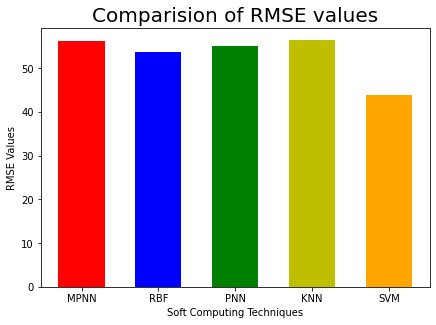

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.9,0.9])
meth = ['MPNN', 'RBF', 'PNN', 'KNN', 'SVM']
metr = [m_rmse, r_rmse, p_rmse, k_rmse, s_rmse]
plt.title('Comparision of RMSE values', fontsize=20)
plt.xlabel('Soft Computing Techniques')
plt.ylabel('RMSE Values')
ax.bar(meth, metr, width=0.6, color=['r','b','g','y',"orange"])
plt.show()

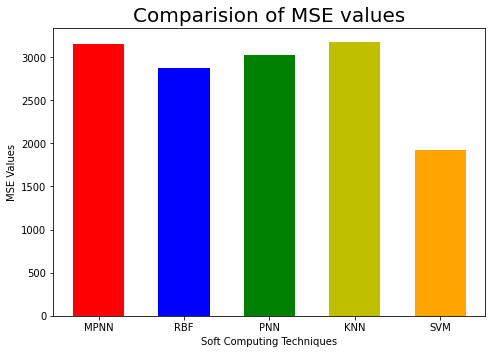

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
meth = ['MPNN', 'RBF', 'PNN', 'KNN', 'SVM']
metr = [m_mse, r_mse, p_mse, k_mse, s_mse]
plt.title('Comparision of MSE values', fontsize=20)
plt.xlabel('Soft Computing Techniques')
plt.ylabel('MSE Values')
ax.bar(meth, metr, width=0.6, color=['r','b','g','y',"orange"])
plt.show()

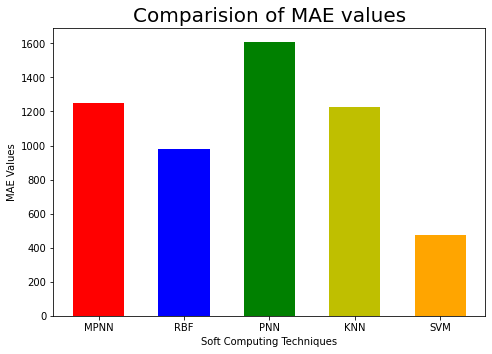

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
meth = ['MPNN', 'RBF', 'PNN', 'KNN', 'SVM']
metr = [m_mae, r_mae, p_mae, k_mae, s_mae]
plt.title('Comparision of MAE values', fontsize=20)
plt.xlabel('Soft Computing Techniques')
plt.ylabel('MAE Values')
ax.bar(meth, metr, width=0.6, color=['r','b','g','y','orange'])
plt.show()

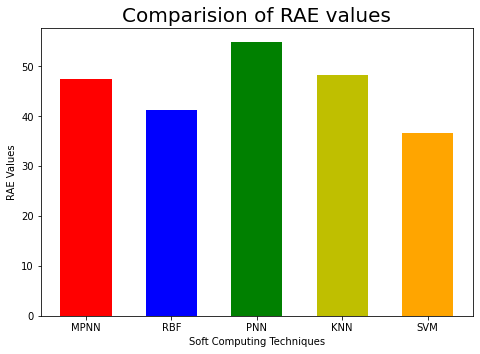

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
meth = ['MPNN', 'RBF', 'PNN', 'KNN', 'SVM']
metr = [m_rae, r_rae, p_rae, k_rae, s_rae]
plt.title('Comparision of RAE values', fontsize=20)
plt.xlabel('Soft Computing Techniques')
plt.ylabel('RAE Values')
ax.bar(meth, metr, width=0.6, color=['r','b','g', 'y','orange'])
plt.show()

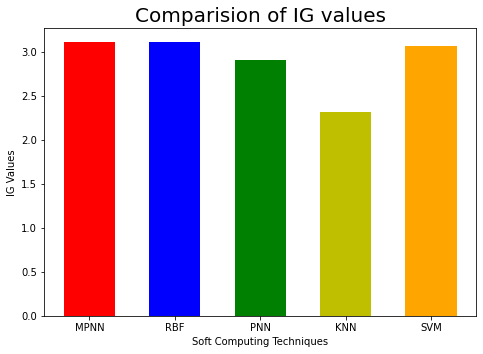

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
meth = ['MPNN', 'RBF', 'PNN', 'KNN', 'SVM']
metr = [m_ig, r_ig, p_ig, k_ig, s_ig]
plt.title('Comparision of IG values', fontsize=20)
plt.xlabel('Soft Computing Techniques')
plt.ylabel('IG Values')
ax.bar(meth, metr, width=0.6, color=['r','b','g', 'y','orange'])
plt.show()

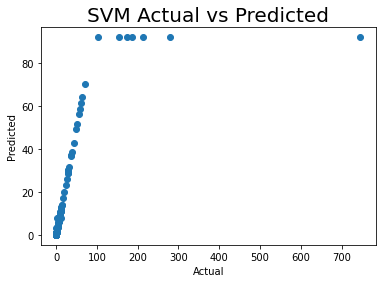

In [ ]:
plt.scatter(svm_test, svm_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVM Actual vs Predicted", fontsize=20)
plt.show()